## CE9010 Project - Group 4
## Brain Tumour Detection
 Sun Yun Qian Priscila & Lau Zhe Ru Zachary
<hr>

## 1. Problem Description
<hr>

## 2. Data Acquisition
<hr>

In [1]:
import kaggle

In [2]:
#list datasets in the brain category
!kaggle datasets list -s brain

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mateuszbuda/lgg-mri-segmentation                             Brain MRI segmentation                             714MB  2019-05-02 21:32:45           4277        126  0.8235294        
navoneel/brain-mri-images-for-brain-tumor-detection          Brain MRI Images for Brain Tumor Detection          15MB  2019-04-14 15:15:54           7566        153  0.5              
wanghaohan/confused-eeg                                      Confused student EEG brainwave data                109MB  2018-03-28 20:52:52           5242        236  0.7941176        
berkeley-biosense/synchronized-brainwave-dataset             Synchronized Brainw

In [3]:
#list files of a dataset
!kaggle datasets files navoneel/brain-mri-images-for-brain-tumor-detection

name           size  creationDate         
------------  -----  -------------------  
no/19 no.jpg    6KB  2019-04-14 15:15:52  
no/25 no.jpg    8KB  2019-04-14 15:15:52  
no/23 no.jpg    9KB  2019-04-14 15:15:52  
no/1 no.jpeg   53KB  2019-04-14 15:15:52  
no/22 no.jpg    7KB  2019-04-14 15:15:52  
no/2 no.jpeg   78KB  2019-04-14 15:15:52  
no/17 no.jpg    5KB  2019-04-14 15:15:52  
no/20 no.jpg    8KB  2019-04-14 15:15:52  
no/18 no.jpg    6KB  2019-04-14 15:15:52  
no/24 no.jpg    6KB  2019-04-14 15:15:52  
no/13 no.jpg    4KB  2019-04-14 15:15:52  
no/21 no.jpg    6KB  2019-04-14 15:15:52  
no/26 no.jpg    7KB  2019-04-14 15:15:52  
no/28 no.jpg    6KB  2019-04-14 15:15:52  
no/10 no.jpg    4KB  2019-04-14 15:15:52  
no/14 no.jpg    6KB  2019-04-14 15:15:52  
no/15 no.jpg    7KB  2019-04-14 15:15:52  
no/12 no.jpg    4KB  2019-04-14 15:15:52  
no/27 no.jpg    5KB  2019-04-14 15:15:52  
no/11 no.jpg    3KB  2019-04-14 15:15:52  
yes/Y113.JPG   19KB  2019-04-14 15:15:52  
yes/Y104.jp

In [4]:
#download dataset
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection --unzip 


  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:02, 6.22MB/s]
 13%|#3        | 2.00M/15.1M [00:00<00:02, 6.58MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:01, 7.14MB/s]
 26%|##6       | 4.00M/15.1M [00:00<00:01, 6.72MB/s]
 33%|###3      | 5.00M/15.1M [00:00<00:01, 7.29MB/s]
 40%|###9      | 6.00M/15.1M [00:00<00:01, 7.78MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:01, 7.36MB/s]
 53%|#####2    | 8.00M/15.1M [00:01<00:01, 6.82MB/s]
 60%|#####9    | 9.00M/15.1M [00:01<00:01, 4.94MB/s]
 66%|######6   | 10.0M/15.1M [00:01<00:01, 4.14MB/s]
 73%|#######2  | 11.0M/15.1M [00:02<00:00, 4.45MB/s]
 79%|#######9  | 12.0M/15.1M [00:02<00:00, 5.12MB/s]
 86%|########6 | 13.0M/15.1M [00:02<00:00, 5.86MB/s]
 93%|#########2| 14.0M/15.1M [00:02<00:00, 6.55MB/s]
 99%|#########9| 15.0M/15.1M [00:02<00:00, 6.40MB/s]
100%|##########| 15.1M/15.1M [00:02<00:00, 6.05MB/s]


## Data Exploration & Pre-Processing
<hr>

In [5]:
import time
import random
import sklearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import cv2 #pip install opencv-python (image functions)

In [6]:
yes=os.listdir('./brain_tumor_dataset/yes')#returns a list containing the names of the jpg file in the directory
no=os.listdir('./brain_tumor_dataset/no')
print(yes[1])

Y10.jpg


[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]


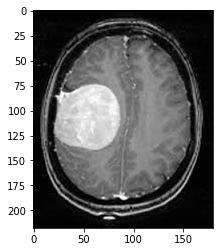

In [7]:
#show one training sample
img = cv2.imread('./brain_tumor_dataset/yes/'+yes[0])#read image into an array of row (height) x column (width) x color (3).
#The order of color is BGR (blue, green, red).
print(img)

from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

In [8]:
#resize all image and place them in lists
X=[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    img = cv2.resize(img, (224, 224) )   
    #(b, g, r)=cv2.split(img) 
    #img=cv2.merge([r,g,b])
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    img = cv2.resize(img, (224, 224) )
    #(b, g, r)=cv2.split(img) 
    #img=cv2.merge([r,g,b])
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)


(224, 224)


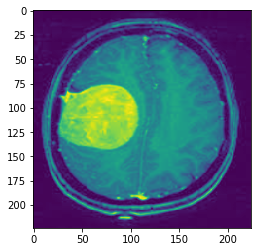

In [9]:
print(X[0].shape)#an image array
plt.imshow(X[0], interpolation='nearest')

In [10]:
X = np.asarray(X)#convert the list of image arrays to an array
X.shape

(253, 224, 224)

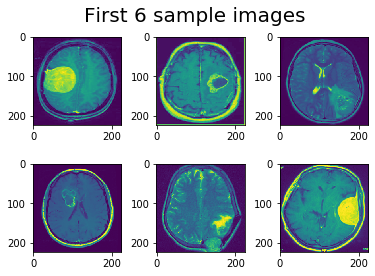

In [11]:
#Visualise
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X,start,end,r,c,title=None):
    """X is an array containing image arrays of size (224,224); r is row; c is column; 
    start is start index; end is end index;
    Output images arrange in grid rxc"""
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)#adjust spacing between plots
    for i in range(start+1, end+1):#visualise first 6 image
        ax = fig.add_subplot(r, c, i)
        ax.imshow(X[i-1], interpolation='nearest')
    fig.suptitle(title, fontsize=20)
        
plot_images(X,0,6,2,3,"First 6 sample images")


In [12]:
# normalize data!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X = X.astype('float32')
X /= 255

In [13]:
#y-labels
yes_labels=np.full(len(yes),1)
no_labels=np.full(len(no),0)
y=np.concatenate([yes_labels,no_labels])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#split data
n=len(X)#number of image
index = np.arange(0,n,1)
len_train = round(n*0.7)
len_test = n-len_train
print ("total number of data: ",n)
print ("number of train data :",len_train,"number of test data :",len_test)

total number of data:  253
number of train data : 177 number of test data : 76


In [15]:
img_shape = img.shape[:2]
print('image size = ',img_shape)


image size =  (224, 224)


In [16]:
X[0].shape

(224, 224)

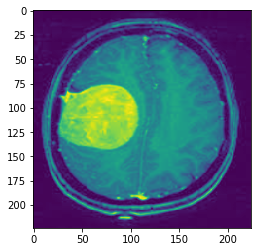

In [17]:
# create matrix to store all flattened images
immatrix = np.array([X[i].flatten()
              for i in range(n)],'f')
plt.imshow(immatrix[0].reshape(224,224), interpolation='nearest')

In [18]:
#split flattened images into training set and test set
from random import sample
X_train, X_test= [],[]
y_train, y_test= [],[]
test_index = sample(set(index), len_test)# Prints list of random index of given length len_test

for i in range(n):
    if i in test_index:
        X_test.append(immatrix[i])
        y_test.append(y[i])
    else:
        X_train.append(immatrix[i])
        y_train.append(y[i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


print("X_train :",X_train.shape,"X_test :",X_test.shape)
print("y_train :",y_train.shape,"y_test :",y_test.shape)

X_train : (177, 50176) X_test : (76, 50176)
y_train : (177,) y_test : (76,)


In [19]:
#check shapes of train and test data

print("Shape of X in training data:",X_train.shape)
print("Shape of X in testing data:",X_test.shape)
print("Shape of y in training data:",y_train.shape)
print("Shape of y in testing data:",y_test.shape)

Shape of X in training data: (177, 50176)
Shape of X in testing data: (76, 50176)
Shape of y in training data: (177,)
Shape of y in testing data: (76,)


## PCA
<hr>

In [20]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)
print ('Time: ',time.time()-t)

Time:  2.917792558670044


In [21]:
#Covariance
#Long run Time:  98.02181911468506
t = time.time()
print(pca.get_covariance().shape)
print('Time: ',time.time()-t)

(50176, 50176)
Time:  114.80633687973022


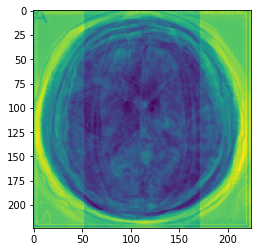

In [22]:

pca.components_[1].reshape(224,224)
plt.imshow(pca.components_[1].reshape(224,224), interpolation='nearest')

In [23]:
#variance
k = 0
var = 0
while var < 0.95 :
    var = var + pca.explained_variance_ratio_[k]
    k = k + 1
k -= 1

print('k=',k)
print('captured variance=',var)

k= 100
captured variance= 0.9513363406294957


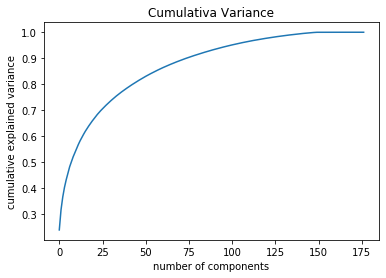

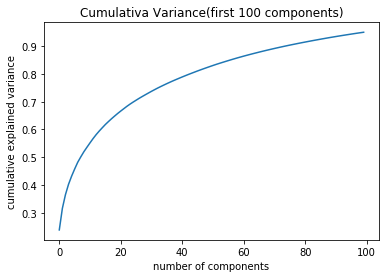

In [24]:
#Cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance')
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance(first %i components)' %k)
plt.show()

In [25]:
#run PCA with k components
pca = PCA(n_components = k, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)#returns training data with shape (n_samples, n_components/features)
#projected = pca.inverse_transform(X_train_pca)!!!!!!!!!!!!!!!!!!!!!!!!!!!!!is this step necessary!!!!!!!!!!!!!!!!!

In [26]:
print(X_train_pca.shape)#reduced to k features
#print(projected.shape)
print(X_train.shape)

(177, 100)
(177, 50176)


## Unsupervised Classification - K-means
<hr>

In [27]:
# Compute Accuracy
def compute_accuracy(y_pred,y):
    diff = (y_pred == y).astype('int')
    accuracy = sum(diff)/ y.shape[0]
    
    return accuracy

In [28]:
#if class labels are reversed
def reverse(y_kmeans):
    where_0 = np.where(y_kmeans == 0)
    where_1 = np.where(y_kmeans == 1)

    y_kmeans[where_0] = 1
    y_kmeans[where_1] = 0
    return y_kmeans
    
    

In [29]:
#K means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca)#vs X_train (has 50176 features)????????????????????????????????????????
y_kmeans_pca = kmeans.predict(X_train_pca)#give kmean prediction labels
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca)#vs X_train (has 50176 features)????????????????????????????????????????
y_kmeans_pca = kmeans.predict(X_train_pca)#give kmean prediction labels
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca)#vs X_train (has 50176 features)????????????????????????????????????????
y_kmeans_pca = kmeans.predict(X_train_pca)#give kmean prediction labels

In [30]:
print(y_kmeans_pca.shape)

(177,)


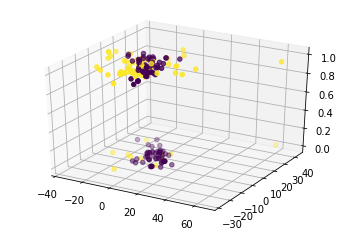

In [31]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

In [32]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process. If class 
#labels are swapped accuracy is likely to be 1-the actual accuracy, which is less than 0.5
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [33]:
#check
print(y_kmeans_pca)

[1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [34]:
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.632768361581921


In [36]:
#K means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)# (has 50176 features)
y_kmeans = kmeans.predict(X_train)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)# (has 50176 features)
y_kmeans = kmeans.predict(X_train)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)# (has 50176 features)
y_kmeans = kmeans.predict(X_train)


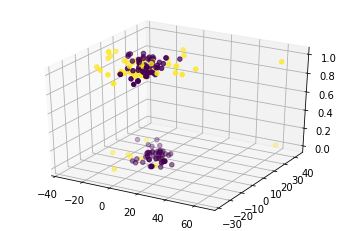

In [37]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans, depthshade=True)

In [38]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process. If class 
#labels are swapped accuracy is likely to be 1-the actual accuracy, which is less than 0.5
if compute_accuracy(y_kmeans,y_train)<0.5:
    y_kmeans=reverse(y_kmeans)

In [39]:
print(y_kmeans)

[0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [40]:
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
print('accuracy (no pca)=',compute_accuracy(y_kmeans,y_train))
#In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy)!
#This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.
#This means, you can produce a lot of useless features and eliminate useful features after PCA.
#Instead, The main benefit to PCA is reducing the size of your feature vectors for computational efficiency. 
#PCA is used to remove the least beneficial features so you have a smaller data set, but without losing too much predictive power.


accuracy (no pca)= 0.6101694915254238


## Supervised classification - Logistic Regression
<hr>

In [ ]:
#logistic regression----------------------------------------------------------------------------------------
#create X matrix
#linear predictive function

In [ ]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_test_pca = pca.fit_transform(X_test)
print ('Time: ',time.time()-t)

In [ ]:
# run logistic regression with scikit-learn

from sklearn.linear_model import LogisticRegression
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(X_train_pca, y_train) # learn the model parameters with k=101 principal components (X_train_pca=(n_samples, n_compenents) for training data)
print('Time=',time.time() - start)

## Neural Networks?
<hr>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.vgg16 import VGG16

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)